# Drawing the S-curve with CDF

**Why we use range -3 to 3?**

The np.linspace(-3, 3, 1000) function is used to generate a sequence of 1000 evenly spaced values between -3 and 3. This range is chosen because it’s a common practice to visualize the normal distribution over a range of values that extends about 3 standard deviations on either side of the mean.

Since the standard deviation in our example is 1, this range covers about 99.7% of the data in a normal distribution (according to the empirical rule or 68-95-99.7 rule). This ensures that the generated S-curve will cover most of the significant parts of the distribution. However, you can adjust this range as needed depending on your specific requirements. For example, if you want to focus on the area closer to the mean, you could use a smaller range. Conversely, if you want to see the behavior of the distribution further from the mean, you could use a larger range.



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/Othercomputers/MacBook Air'im/Desktop/School/Tas2/data/Score-Score.csv", sep=",")
data.head()

,District Name,Score,Score-normalized,Score-mu,Score-standardized
0,Şişli,6.959,1.000,0.000,3.206
1,Beşiktaş,5.940,0.838,0.162,2.476
2,Kadıköy,4.910,0.673,0.327,1.738
3,Bakırköy,4.465,0.603,0.397,1.419
4,Fatih,4.226,0.564,0.436,1.247


In [ ]:
data_mu = data[["Score-mu"]]
data_mu.head()

,Score-mu
0,0.000
1,0.162
2,0.327
3,0.397
4,0.436


In [ ]:
type(data)

pandas.core.frame.DataFrame

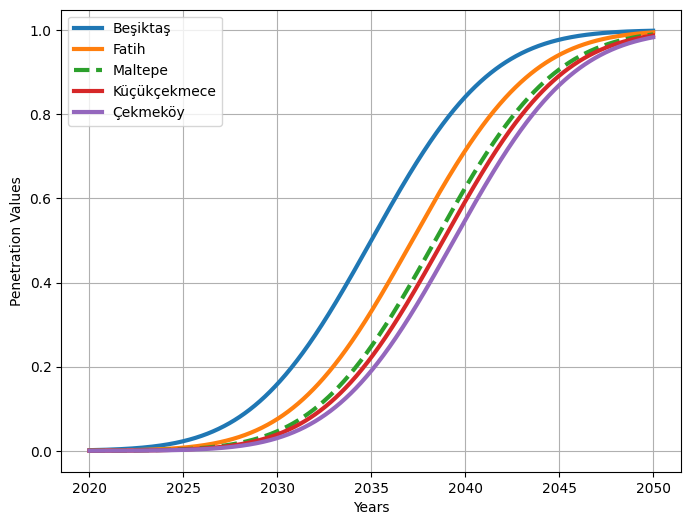

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


# Define the standard deviation
sigma = 1
numof_sigma = 3

# Create a range of x values
x = np.linspace((-numof_sigma)*sigma, numof_sigma*sigma, 1000)
x_ = np.linspace(0, 30, 1000)+2020

# Initiate the data
data_districts = { "Beşiktaş":        {"mu":0, "color":"black", "style":"-"},
                  "Fatih":      {"mu":1-0.564, "color":"red", "style":"-"},
                  "Maltepe":         {"mu":1-0.319, "color":"purple", "style":"--"},
                  "Küçükçekmece":      {"mu":1-0.235, "color":"blue", "style":"-"},
                  "Çekmeköy":       {"mu":1-0.122, "color":"red", "style":"-"}
}

numof_periods = 6
# Include the start point (0. period) by adding 1
periods = np.linspace((-numof_sigma)*sigma, numof_sigma*sigma, numof_periods+1)

# Create the plot
plt.figure(figsize=(8, 6))

for name, d in data_districts.items():
    # Calculate the CDF
    cdf = norm.cdf(x, d["mu"], sigma)
    # Plot the CDF
    plt.plot(x_, cdf, label=name, linestyle=d["style"], linewidth=3)


plt.xlabel('Years')
plt.ylabel('Penetration Values')
plt.legend()
plt.grid(True)
plt.savefig('S-curves.png')

plt.show()

In [ ]:
periods

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

# Finding exact value of CDF for each period

We can find the exact time period's multiplier for each district with this function below

In [ ]:
# Find the CDF value in a specific x position
def find_cdf(x, mu, sigma=1):
  # Calculate the CDF value
  cdf_value = norm.cdf(x, mu, sigma)
  return cdf_value

# For example
print(f'The CDF value (the original multiplier for s-curve) at end of the 4. period for Şişli is {find_cdf(periods[3], data_districts["Şişli"]["mu"])}')



# This is the latest ratio of ev at the end of the last period
EV_RATIO = 0.5

# Find the numof ev at the end of the x (-3 to 3) period
def find_numof_ev(x, mu, numof_v, sigma=1):
  cdf_val = find_cdf(x, mu, sigma)
  return numof_v*cdf_val*EV_RATIO

The CDF value (the original multiplier for s-curve) at end of the 4. period for Şişli is 0.5


In [ ]:
multiplier = []
for i in range(len(data_mu)):
  multiplier.append([])
  for j in range(len(periods)):
    cdf_value = find_cdf(periods[j], data_mu["Score-mu"].iloc[i])
    multiplier[i].append(round(cdf_value, 5))

multiplier_dict = {}

for i in range(len(multiplier[0])):
  multiplier_dict["Multiplier Period-"+str(i)] = [sublist[i] for sublist in multiplier]

df_multiplier = pd.DataFrame(multiplier_dict)
df_multiplier.head()

,Multiplier Period-0,Multiplier Period-1,Multiplier Period-2,Multiplier Period-3,Multiplier Period-4,Multiplier Period-5,Multiplier Period-6
0,0.00135,0.02275,0.15866,0.50000,0.84134,0.97725,0.99865
1,0.00078,0.01531,0.12262,0.43565,0.79898,0.96697,0.99773
2,0.00044,0.00998,0.09225,0.37183,0.74953,0.95284,0.99624
3,0.00034,0.00826,0.08121,0.34568,0.72675,0.94553,0.99538
4,0.00030,0.00743,0.07550,0.33142,0.71362,0.94109,0.99483


In [ ]:
combined_df = pd.concat([data, df_multiplier], axis=1)
combined_df.head()

,District Name,Score,Score-normalized,Score-mu,Score-standardized,Multiplier Period-0,Multiplier Period-1,Multiplier Period-2,Multiplier Period-3,Multiplier Period-4,Multiplier Period-5,Multiplier Period-6
0,Şişli,6.959,1.000,0.000,3.206,0.00135,0.02275,0.15866,0.50000,0.84134,0.97725,0.99865
1,Beşiktaş,5.940,0.838,0.162,2.476,0.00078,0.01531,0.12262,0.43565,0.79898,0.96697,0.99773
2,Kadıköy,4.910,0.673,0.327,1.738,0.00044,0.00998,0.09225,0.37183,0.74953,0.95284,0.99624
3,Bakırköy,4.465,0.603,0.397,1.419,0.00034,0.00826,0.08121,0.34568,0.72675,0.94553,0.99538
4,Fatih,4.226,0.564,0.436,1.247,0.00030,0.00743,0.07550,0.33142,0.71362,0.94109,0.99483


In [ ]:
# Export the DataFrame to a CSV file named "data.csv"
combined_df.to_csv("multiplier.csv", index=False)

print("DataFrame exported successfully!")


DataFrame exported successfully!
